In [90]:
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Exploration

In [2]:
df = pd.read_csv("Resources/WineQuality.csv")
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  object 
dtypes: float64(11), int64(2), object(1)
memory usage: 3.5+ MB


In [4]:
df["Unnamed: 0"].nunique()

6449

In [5]:
df.tail()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
32480,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine
32481,6414,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5,White Wine
32482,1126,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,White Wine
32483,2924,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,White Wine
32484,5462,8.1,0.280,0.46,15.4,0.059,32.0,177.0,1.00040,3.27,0.58,9.0,4,White Wine


In [6]:
# create dataframe with sample Unnamed: 0 to see if there are any differences in content before dropping duplicates
df_similar = df[df["Unnamed: 0"] == 2838]
df_similar

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
11340,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine
19436,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine
20657,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine
21103,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine
31930,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine
32480,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine


In [7]:
dropped_df = df.drop_duplicates()
dropped_df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [8]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6449 entries, 0 to 32056
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6449 non-null   int64  
 1   fixed acidity         6449 non-null   float64
 2   volatile acidity      6449 non-null   float64
 3   citric acid           6449 non-null   float64
 4   residual sugar        6449 non-null   float64
 5   chlorides             6449 non-null   float64
 6   free sulfur dioxide   6449 non-null   float64
 7   total sulfur dioxide  6449 non-null   float64
 8   density               6449 non-null   float64
 9   pH                    6449 non-null   float64
 10  sulphates             6449 non-null   float64
 11  alcohol               6449 non-null   float64
 12  quality               6449 non-null   int64  
 13  Type                  6449 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 755.7+ KB


In [9]:
dropped_df.dropna()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31698,499,7.4,0.190,0.31,14.5,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6,White Wine
31747,1425,6.4,0.160,0.42,1.0,0.036,29.0,113.0,0.99080,3.18,0.52,11.0,6,White Wine
31753,1514,5.8,0.250,0.26,13.1,0.051,44.0,148.0,0.99720,3.29,0.38,9.3,5,White Wine
31825,2606,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6,6,Red Wine


what are the unique values of each of these numbers?

# PCA Method for unsupervised machine learning

In [10]:
dropped_df.rename(columns={"Unnamed: 0": "wine_id"}, inplace=True)
dropped_df.set_index("wine_id", inplace=True)
dropped_df.head()

/var/folders/gw/n78mkc1j49988p10rhjv60yh0000gn/T/ipykernel_78628/3244810994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df.rename(columns={"Unnamed: 0": "wine_id"}, inplace=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
wine_id,,,,,,,,,,,,,
2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [62]:
# Check variation of wine density to determine whether to drop or not
print(dropped_df["density"].min())
print(dropped_df["density"].max())
print(f'The variation in wine density is {dropped_df["density"].max() - dropped_df["density"].min()}')

0.98711
1.03898
The variation in wine density is 0.05186999999999997


### The variations in wine density is very small, and most likely does not have any effect on the quality of wine

In [61]:
# Check variation of alcohol content to determine whether to drop or not
print(dropped_df["alcohol"].min())
print(dropped_df["alcohol"].max())
print(f'The variation in alcohol content is {dropped_df["alcohol"].max() - dropped_df["alcohol"].min()}')

8.0
14.9
The variation in alcohol content is 6.9


In [45]:
df_no_density = dropped_df.drop(columns="density")
df_no_density.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Type
wine_id,,,,,,,,,,,,
2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,3.52,0.65,10.4,6,White Wine
2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,3.34,0.46,11.7,6,White Wine
1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,3.76,0.49,11.3,6,White Wine
3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,3.16,0.31,12.5,6,White Wine
4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,2.97,0.28,10.8,5,White Wine


In [46]:
type_dummies = pd.get_dummies(dropped_df["Type"], dtype=int)
type_dummies.head()

,Red Wine,White Wine
wine_id,,
2732,0,1
2607,0,1
1653,0,1
3264,0,1
4931,0,1


In [47]:
df_transformed = pd.concat([df_no_density, type_dummies], axis=1)
df_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Type,Red Wine,White Wine
wine_id,,,,,,,,,,,,,,
2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,3.52,0.65,10.4,6,White Wine,0,1
2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,3.34,0.46,11.7,6,White Wine,0,1
1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,3.76,0.49,11.3,6,White Wine,0,1
3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,3.16,0.31,12.5,6,White Wine,0,1
4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,2.97,0.28,10.8,5,White Wine,0,1


In [48]:
pca_df = df_transformed.drop(columns="Type")

In [49]:
pca = PCA(n_components=2)

In [50]:
wine_pca = pca.fit_transform(pca_df)
wine_pca[:5]

array([[-10.49962105,  -5.35370893],
       [ 28.88011238,  16.37160878],
       [-24.25928297,  10.26234253],
       [ -1.28130186,   2.81297456],
       [  9.82648842, -23.56288986]])

In [51]:
pca.explained_variance_ratio_

array([0.95351287, 0.04061439])

In [52]:
wine_pca_df = pd.DataFrame(
    wine_pca,
    columns=["PCA1", "PCA2"]
)
wine_pca_df.head()

,PCA1,PCA2
0,-10.499621,-5.353709
1,28.880112,16.371609
2,-24.259283,10.262343
3,-1.281302,2.812975
4,9.826488,-23.562890


In [53]:
inertia = []
k = list(range(1,11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=3)
    k_model.fit(wine_pca_df)
    inertia.append(k_model.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

df_elbow.head()

/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

,k,inertia
0,1,2.270967e+07
1,2,8.420014e+06
2,3,4.176525e+06
3,4,2.894166e+06
4,5,2.256295e+06


In [54]:
# Plot the Elbow Curve
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [55]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(wine_pca_df)

# Make predictions
k_3 = model.predict(wine_pca_df)

# Create a copy of the PCA DataFrame
wine_pca_predictions_df = wine_pca_df.copy()

# Add a class column with the labels
wine_pca_predictions_df["quality"] = k_3

/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
# Plot the clusters
wine_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="quality"
)

:NdOverlay   [quality]
   :Scatter   [PCA1]   (PCA2)

### Since density varied very little, removing it had little to no effect on PCA cluster formations

# KMeans method without PCA

In [65]:
pca_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Red Wine,White Wine
wine_id,,,,,,,,,,,,,
2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,3.52,0.65,10.4,6,0,1
2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,3.34,0.46,11.7,6,0,1
1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,3.76,0.49,11.3,6,0,1
3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,3.16,0.31,12.5,6,0,1
4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,2.97,0.28,10.8,5,0,1


In [67]:
dropped_df_scaled = StandardScaler().fit_transform(pca_df[["fixed acidity", "volatile acidity", 
                                                               "citric acid", "residual sugar",
                                                               "chlorides", "free sulfur dioxide",
                                                               "total sulfur dioxide",
                                                               "pH", "sulphates",
                                                               "alcohol", "quality", "Red Wine"]])

In [68]:
dropped_df_transformed = pd.DataFrame(dropped_df_scaled, columns=["fixed acidity", "volatile acidity", 
                                                                  "citric acid", "residual sugar",
                                                                  "chlorides", "free sulfur dioxide",
                                                                  "total sulfur dioxide",
                                                                  "pH", "sulphates",
                                                                  "alcohol", "quality", "Red Wine"])

In [69]:
df_transformed.fillna(0, inplace=True)

In [70]:
inertia = []
k = list(range(1, 11))

In [71]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=3)
    k_model.fit(dropped_df_transformed)
    inertia.append(k_model.inertia_)

/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

In [72]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,77388.000000
1,2,56914.316309
2,3,49003.273633
3,4,44241.879420
4,5,41080.468650


In [73]:
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [86]:
model = KMeans(n_clusters=3, random_state=3)
model.fit(dropped_df_transformed)
k_3 = model.predict(dropped_df_transformed)
centroids = model.cluster_centers_
predictions_df = dropped_df_transformed.copy()
predictions_df["clusters"] = k_3
print(k_3)

/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 1 2 1]


In [87]:
predictions_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Red Wine,clusters
0,0.143293,-1.029115,-0.198223,-0.850510,-0.257276,-0.423771,-0.156377,1.875367,0.798115,-0.075701,0.209325,-0.570367,0
1,-1.475964,-0.178754,0.420927,1.061460,-0.713235,1.264559,0.427032,0.756658,-0.478483,1.013960,0.209325,-0.570367,0
2,-1.938609,-1.180965,-0.198223,-0.934552,-0.399763,0.251561,-0.456921,3.366979,-0.276915,0.678680,0.209325,-0.570367,0
3,-0.242245,-0.482454,-0.198223,-0.262211,-0.371266,0.139006,-0.032624,-0.362052,-1.486324,1.684520,0.209325,-0.570367,0
4,-0.627782,0.671606,-1.711700,-0.913542,-0.741732,-1.155381,0.267920,-1.542911,-1.687892,0.259580,-0.936634,-0.570367,0


<Axes: >

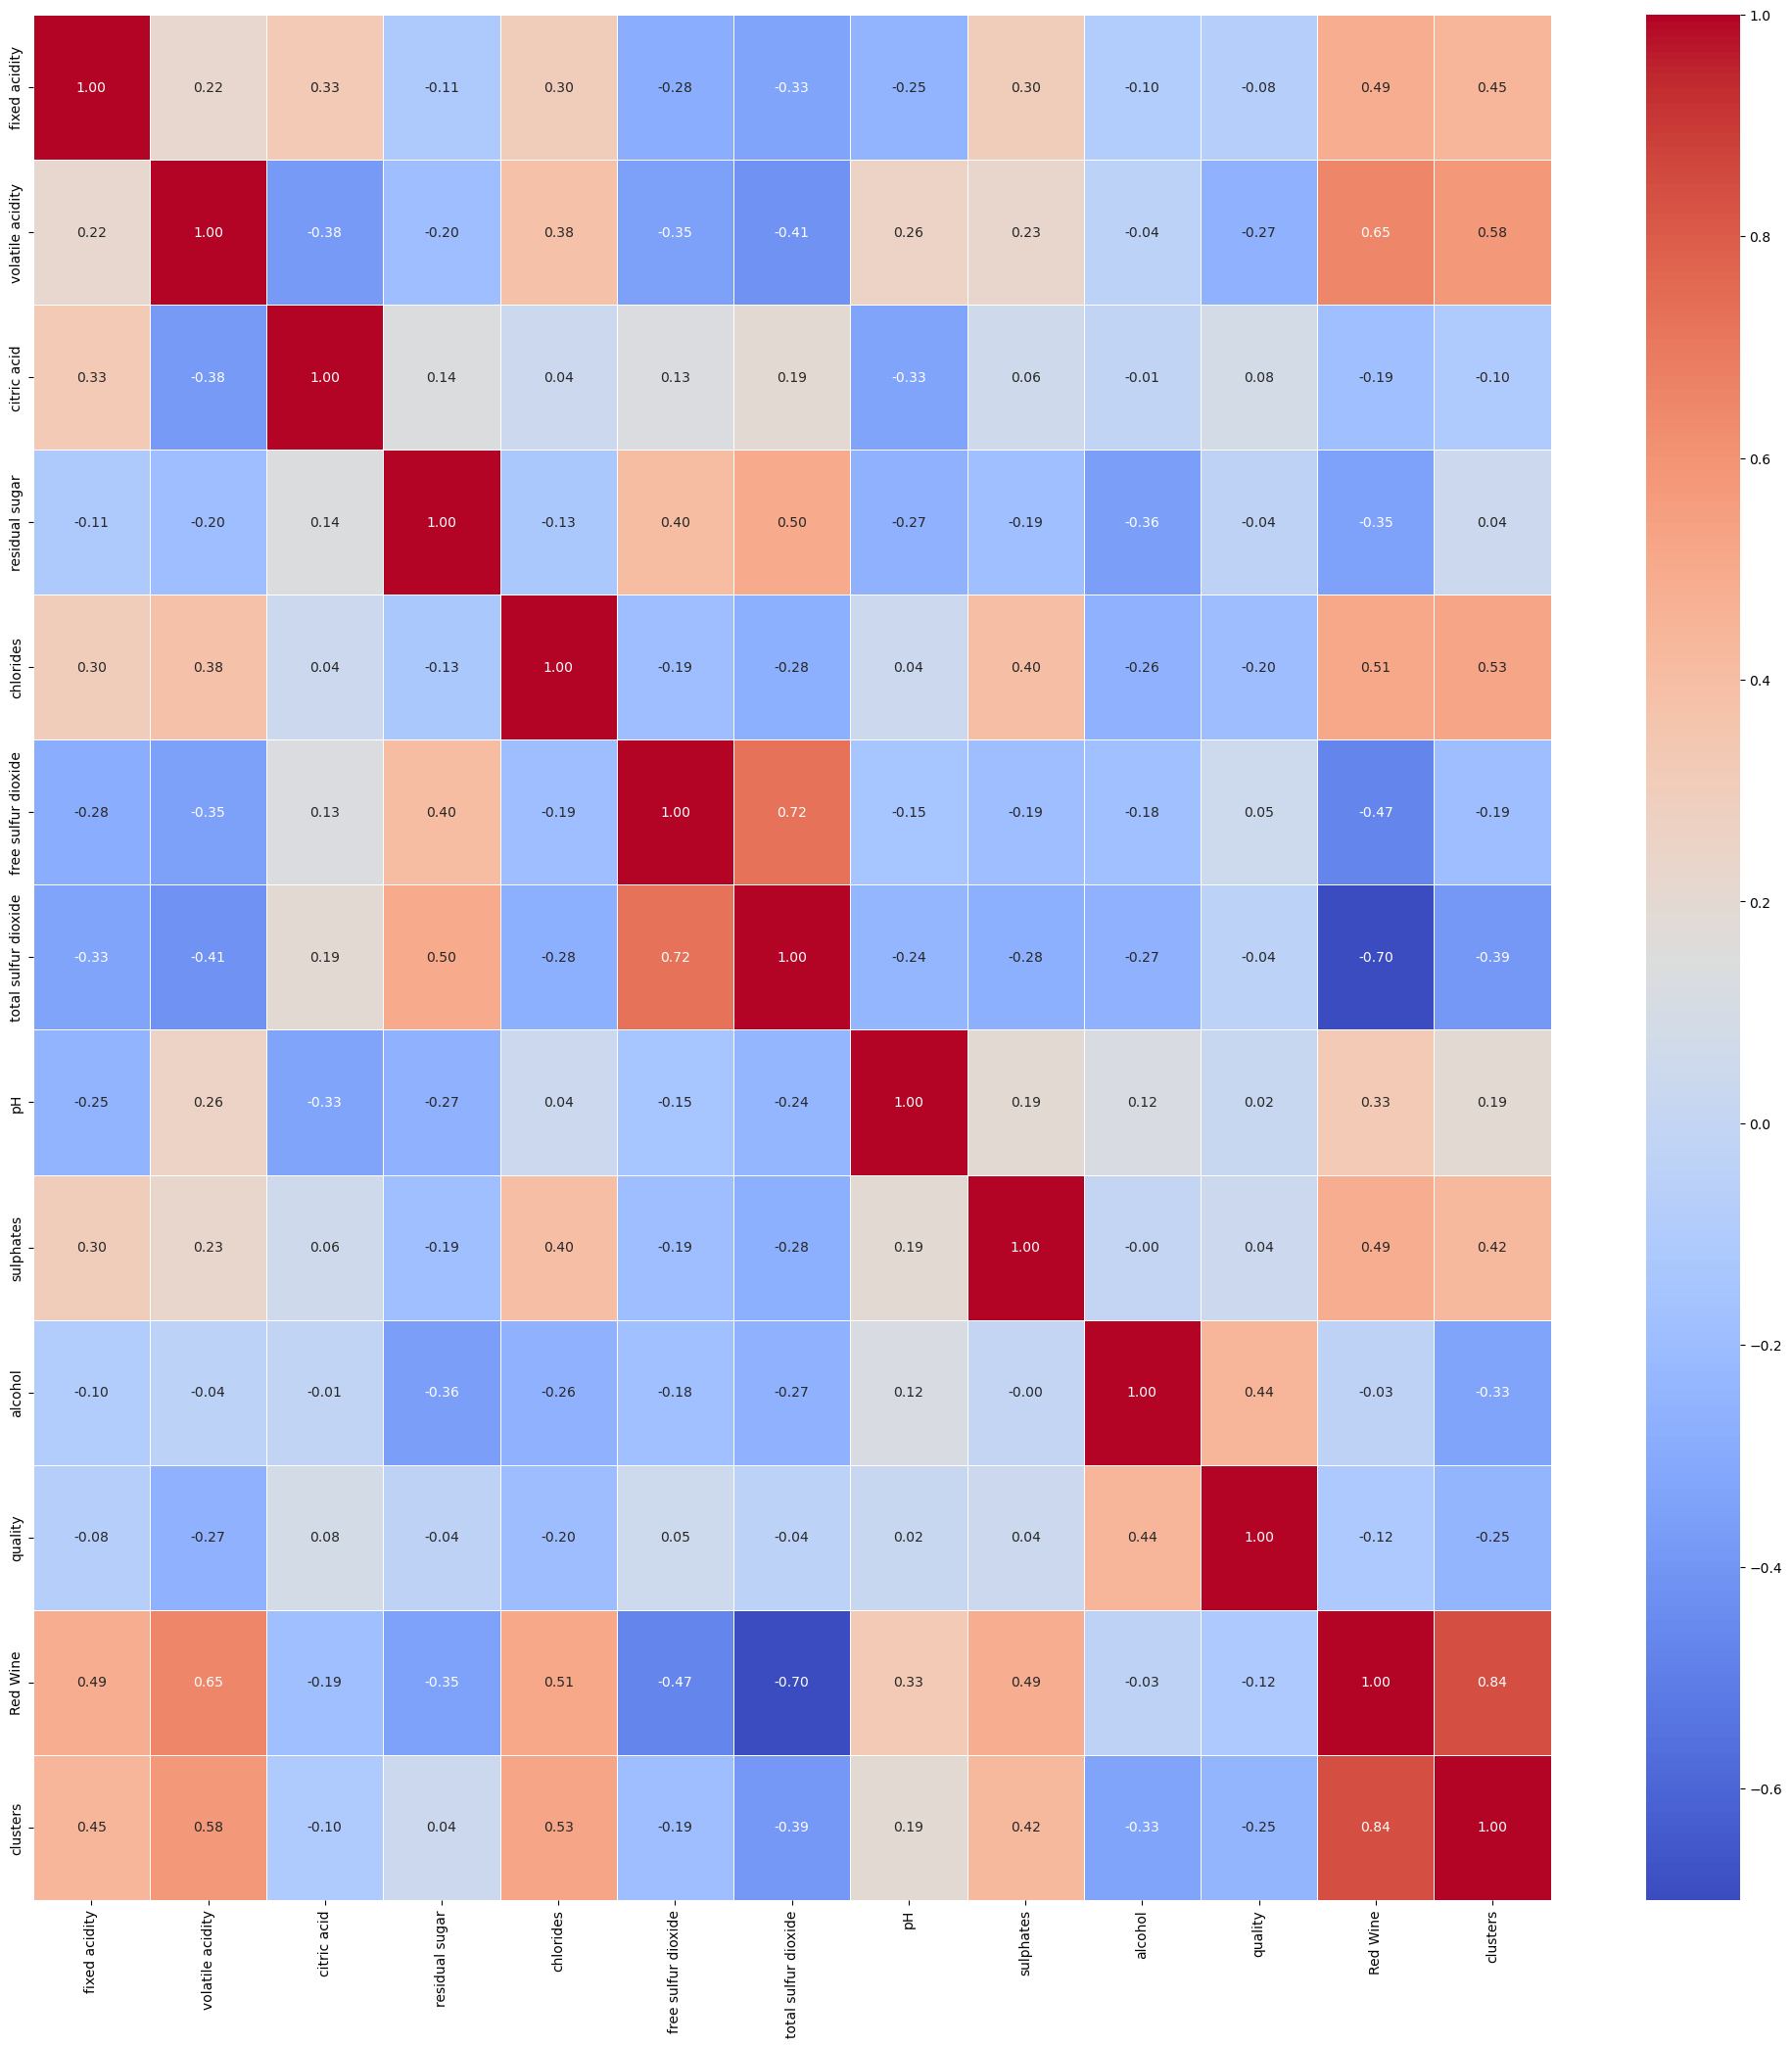

In [98]:
correlation_matrix = predictions_df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

In [82]:
k_scatter = predictions_df.hvplot.scatter(
    x="alcohol",
    y="fixed acidity",
    by="clusters"
)
k_scatter

:NdOverlay   [clusters]
   :Scatter   [alcohol]   (fixed acidity)

In [83]:
sulfer = predictions_df.hvplot.scatter(
    x="free sulfur dioxide",
    y="total sulfur dioxide",
    by="clusters"
)
sulfer

:NdOverlay   [clusters]
   :Scatter   [free sulfur dioxide]   (total sulfur dioxide)

In [84]:
citrus = predictions_df.hvplot.scatter(
    x="citric acid",
    y="volatile acidity",
    by="clusters"
)
citrus

:NdOverlay   [clusters]
   :Scatter   [citric acid]   (volatile acidity)

In [85]:
quality = predictions_df.hvplot.scatter(
    x="quality",
    y="pH",
    by="clusters"
)
quality

:NdOverlay   [clusters]
   :Scatter   [quality]   (pH)